## Flight price dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab

### loading the data

In [2]:
train_df = pd.read_excel('../data/Data_train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test_df = pd.read_excel('../data/Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
### since there are 2 different datasets like train and test, whereas in train there's that price column
### whereas in test data there's no price column, so my approach would be to drop the price column and 
### do the featured engineering using all dataset and at the time of training split the dataset the same way to save the time in 
### cleaning the data

In [4]:
### combining the dataset
df = pd.concat([train_df, test_df])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [5]:
### making a backup copy
df_copy = df.copy()

In [6]:
df_copy

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [7]:
### droping and the price column
df.drop('Price', axis = 1, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64

In [9]:
df.shape

(13354, 10)

### initial obeservations
#### 1. the dataset is fairly big
#### 2. there are only 2 null values on the entire dataset
#### 3. All the columns are categorical

### Starting the FE and EDA

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


### route column

In [11]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [84]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [12]:
### as there are fixed destinations and source so, 
### I am dropping the Route column as no of stops column provide the same significance
df.drop('Route', axis = 1, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info


### Airline column

In [13]:
df['Airline'].isnull().sum()

np.int64(0)

In [87]:
df['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

In [14]:
### for this column I am only keeping the top 3 and rest will go to other and
### then the one hot encoding
top_3_airline = df['Airline'].value_counts().head(3)

In [15]:
top_3_airline

Airline
Jet Airways    4746
IndiGo         2564
Air India      2192
Name: count, dtype: int64

In [16]:
df['Airline'] = df['Airline'].apply(lambda x : x if x in top_3_airline else 'other')

In [17]:
df['Airline'].value_counts()

Airline
Jet Airways    4746
other          3852
IndiGo         2564
Air India      2192
Name: count, dtype: int64

In [18]:
airlines = pd.get_dummies(df['Airline'], dtype = int, prefix = 'airline')
df = pd.concat([df, airlines], axis = 1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_Air India,airline_IndiGo,airline_Jet Airways,airline_other
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,0,1,0,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,1,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,0,0,1,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,0,1,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,0,1,0,0


In [19]:
df.drop(['Airline', 'airline_Air India'], axis = 1, inplace = True)
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_IndiGo,airline_Jet Airways,airline_other
0,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1,0,0
1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,0,0,0
2,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,0,1,0
3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,1,0,0
4,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,1,0,0


### handling the source and destination column

In [94]:
df['Source'].isnull().sum()

np.int64(0)

In [20]:
df['Source'].value_counts()

Source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

In [96]:
df['Destination'].isnull().sum()

np.int64(0)

In [97]:
df['Destination'].value_counts()

Destination
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

In [21]:
df_copy['Route'].value_counts()

Route
DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → RPR → VTZ → HYD             1
BOM → BBI → HYD                   1
BLR → HBX → BOM → NAG → DEL       1
BOM → VGA → TIR → HYD             1
BOM → IXC → DEL → HYD             1
Name: count, Length: 132, dtype: int64

In [100]:
### since I have the access to the route column of the dataset, I will use label encoding
### where the rank will be provided based on the fact if there's a lot of outbound flights, it ranks high
### the destination with more flights coming in results in higher rank

In [22]:
df['Source'].value_counts()

Source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

In [23]:
source = {
    'Delhi' : 4,
    'Kolkata' : 3,
    'Banglore' : 2,
    'Mumbai' : 1,
    'Chennai' : 0
}
df['Source'] = df['Source'].map(source)

In [105]:
### Delhi and New delhi are same

In [24]:
destination = {
'Cochin' : 4,
'Banglore' : 3,
'Delhi' : 2,
'New Delhi' : 2,
'Hyderabad' : 1,
'Kolkata' : 0
}
df['Destination'] = df['Destination'].map(destination)

In [25]:
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_IndiGo,airline_Jet Airways,airline_other
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,2 stops,No info,0,0,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2 stops,No info,0,1,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1 stop,No info,1,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1 stop,No info,1,0,0


### total_stops column

In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [28]:
df['Total_Stops'].isna().sum()

np.int64(1)

In [118]:
### I am doing label encoding for this column as it's probably the most simplest one

In [29]:
stops = {
    '4 stops' : 0,
    '3 stops' : 0,
    'nan' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    'non-stop' : 3
}

In [30]:
df['Total_Stops'] = df['Total_Stops'].map(stops)

In [31]:
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_IndiGo,airline_Jet Airways,airline_other
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,3.0,No info,1,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,2.0,No info,0,0,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2.0,No info,0,1,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1.0,No info,1,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1.0,No info,1,0,0


### Additional_info column

In [32]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [33]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

In [130]:
### this one I am treating as one hot encoding and making 2 categories only
### as there is no clear relation going on

In [34]:
df['Additional_Info'] = df['Additional_Info'].apply(lambda x : 'No info' if x == 'No info' else 'Some info')

In [35]:
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_IndiGo,airline_Jet Airways,airline_other
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,3.0,No info,1,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,2.0,No info,0,0,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2.0,No info,0,1,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1.0,No info,1,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1.0,No info,1,0,0


In [36]:
df['Additional_Info'].value_counts()

Additional_Info
No info      10493
Some info     2861
Name: count, dtype: int64

In [37]:
info = pd.get_dummies(df['Additional_Info'], dtype = int, prefix = 'info')
df = pd.concat([df, info], axis = 1)
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,info_Some info
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,3.0,No info,1,0,0,1,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,2.0,No info,0,0,0,1,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2.0,No info,0,1,0,1,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1.0,No info,1,0,0,1,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1.0,No info,1,0,0,1,0


In [38]:
df.drop(['Additional_Info', 'info_Some info'], axis = 1, inplace = True)
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,3.0,1,0,0,1
1,1/05/2019,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2.0,0,1,0,1
3,12/05/2019,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1
4,01/03/2019,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1


### date of journey column

In [142]:
### for this column I am using simple approach by spliting at the seperator and then making individual columns

In [39]:
df['day'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[0])
df['month'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[1])
df['year'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[2])

In [40]:
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,3.0,1,0,0,1,24,03,2019
1,1/05/2019,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2.0,0,1,0,1,9,06,2019
3,12/05/2019,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019
4,01/03/2019,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019


In [41]:
df.drop('Date_of_Journey', axis = 1, inplace = True)
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year
0,2,2,22:20,01:10 22 Mar,2h 50m,3.0,1,0,0,1,24,03,2019
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019
2,4,4,09:25,04:25 10 Jun,19h,2.0,0,1,0,1,9,06,2019
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019


### Dep_time, Arrival_time and Duration column

In [146]:
### for this all three columns I am keeping the same approach as for the dat_of_journey column

In [42]:
df['dep_hour'] = df['Dep_Time'].apply(lambda x : x.split(':')[0])
df['dep_minute'] = df['Dep_Time'].apply(lambda x : x.split(':')[1])

In [43]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute
0,2,2,22:20,01:10 22 Mar,2h 50m,3.0,1,0,0,1,24,03,2019,22,20
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019,05,50
2,4,4,09:25,04:25 10 Jun,19h,2.0,0,1,0,1,9,06,2019,09,25
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019,18,05
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019,16,50


In [44]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [45]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute
0,2,2,22:20,01:10,2h 50m,3.0,1,0,0,1,24,03,2019,22,20
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019,05,50
2,4,4,09:25,04:25,19h,2.0,0,1,0,1,9,06,2019,09,25
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019,18,05
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019,16,50


In [46]:
df['arrival_hour'] = df['Arrival_Time'].apply(lambda x : x.split(':')[0])
df['arrival_minute'] = df['Arrival_Time'].apply(lambda x : x.split(':')[1])
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute
0,2,2,22:20,01:10,2h 50m,3.0,1,0,0,1,24,03,2019,22,20,01,10
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019,05,50,13,15
2,4,4,09:25,04:25,19h,2.0,0,1,0,1,9,06,2019,09,25,04,25
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019,18,05,23,30
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019,16,50,21,35


In [47]:
df['duration_hours'] = df['Duration'].apply(lambda x : x.split('h')[0])
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,22:20,01:10,2h 50m,3.0,1,0,0,1,24,03,2019,22,20,01,10,2
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019,05,50,13,15,7
2,4,4,09:25,04:25,19h,2.0,0,1,0,1,9,06,2019,09,25,04,25,19
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019,18,05,23,30,5
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019,16,50,21,35,4


In [48]:
df.drop([6474, 2660], axis = 0, inplace = True)

In [49]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,22:20,01:10,2h 50m,3.0,1,0,0,1,24,03,2019,22,20,01,10,2
1,3,3,05:50,13:15,7h 25m,2.0,0,0,0,1,1,05,2019,05,50,13,15,7
2,4,4,09:25,04:25,19h,2.0,0,1,0,1,9,06,2019,09,25,04,25,19
3,3,3,18:05,23:30,5h 25m,1.0,1,0,0,1,12,05,2019,18,05,23,30,5
4,2,2,16:50,21:35,4h 45m,1.0,1,0,0,1,01,03,2019,16,50,21,35,4


In [50]:
df.drop(['Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [51]:
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,03,2019,22,20,01,10,2
1,3,3,2.0,0,0,0,1,1,05,2019,05,50,13,15,7
2,4,4,2.0,0,1,0,1,9,06,2019,09,25,04,25,19
3,3,3,1.0,1,0,0,1,12,05,2019,18,05,23,30,5
4,2,2,1.0,1,0,0,1,01,03,2019,16,50,21,35,4


### making the qq plot for numeric columns

In [52]:
def plot_data(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

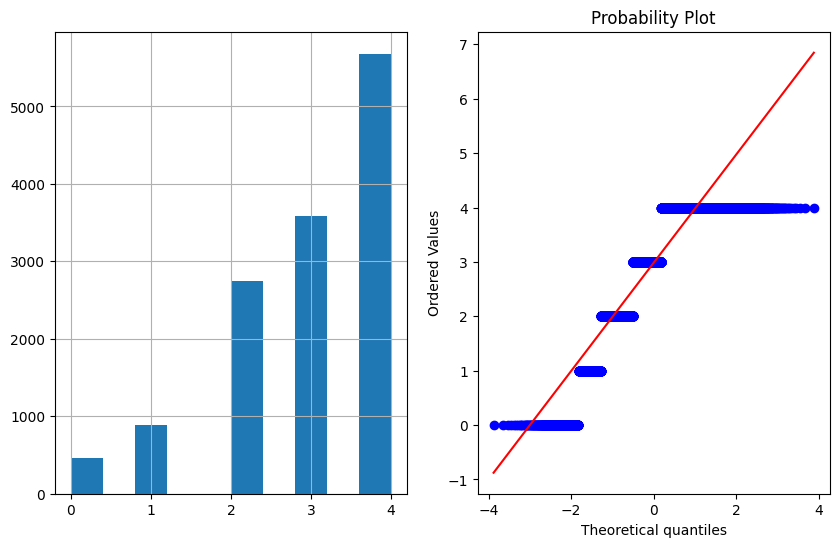

In [62]:
plot_data(df, 'Destination')

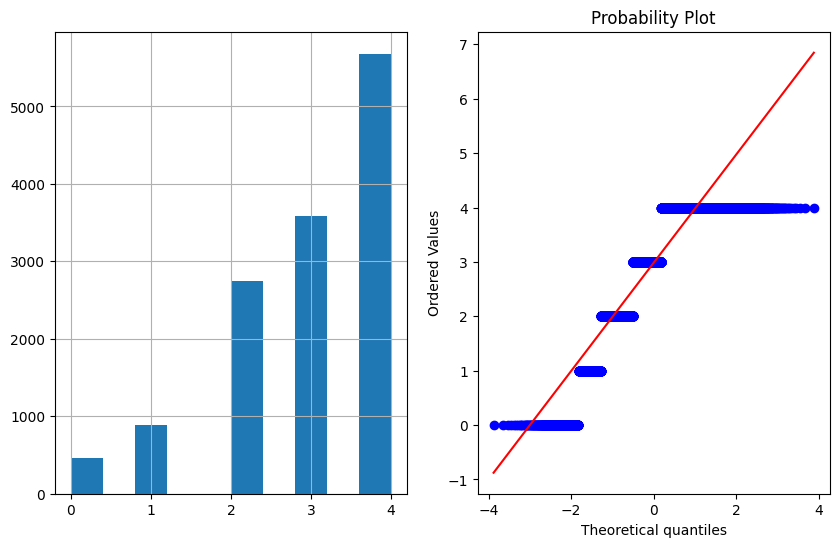

In [63]:
plot_data(df, 'Source')

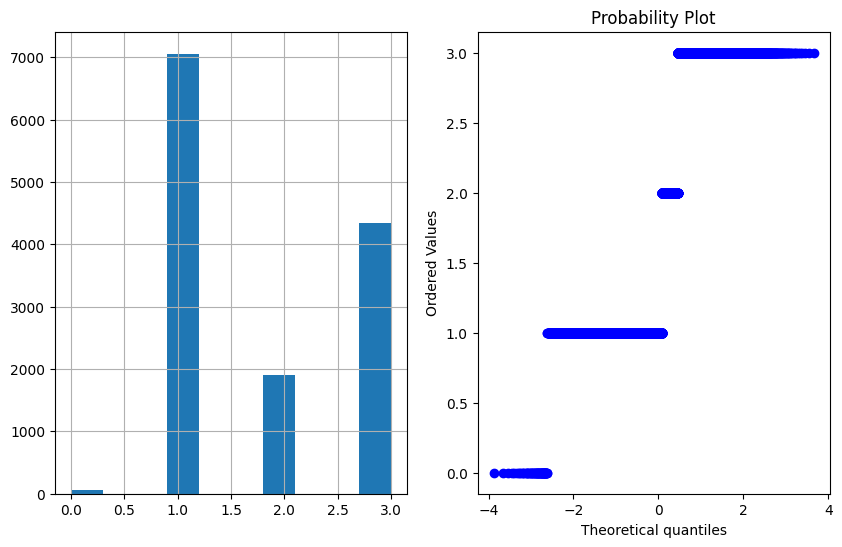

In [64]:
plot_data(df, 'Total_Stops')

### saving the datasetv for the ML algorithms

In [78]:
### in the test dataset there was no price column, so now the training has not been done, 
### I will split the original train and test data from cleaned data df, and then add price column to the train data

In [73]:
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,03,2019,22,20,01,10,2
1,3,3,2.0,0,0,0,1,1,05,2019,05,50,13,15,7
2,4,4,2.0,0,1,0,1,9,06,2019,09,25,04,25,19
3,3,3,1.0,1,0,0,1,12,05,2019,18,05,23,30,5
4,2,2,1.0,1,0,0,1,01,03,2019,16,50,21,35,4


In [66]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [68]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [74]:
train_df[train_df['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327


In [76]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [75]:
test_df[test_df['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info


In [77]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [79]:
df.shape

(13351, 15)

In [82]:
df_copy[df_copy['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327.0
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,NaN


In [83]:
df_copy.drop([6474, 2660], axis = 0, inplace = True)

In [84]:
df_copy.shape

(13351, 11)

In [90]:
clean_train = df.head(10681)

In [89]:
df_copy.head(10681)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [92]:
clean_train['price'] = df_copy['Price'].head(10681)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5904\3055215416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train['price'] = df_copy['Price'].head(10681)


In [93]:
clean_train

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,03,2019,22,20,01,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,05,2019,05,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,06,2019,09,25,04,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,05,2019,18,05,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,01,03,2019,16,50,21,35,4,13302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,3,3.0,0,0,1,1,9,04,2019,19,55,22,25,2,4107.0
10679,3,3,3.0,0,0,0,1,27,04,2019,20,45,23,20,2,4145.0
10680,2,2,3.0,0,1,0,1,27,04,2019,08,20,11,20,3,7229.0
10681,2,2,3.0,0,0,1,1,01,03,2019,11,30,14,10,2,12648.0


In [95]:
df_copy.tail(2670)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [96]:
clean_test = df.tail(2670)

In [97]:
clean_test

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,06,2019,17,30,04,25,10
1,3,3,1.0,1,0,0,1,12,05,2019,06,20,10,20,4
2,4,4,1.0,0,1,0,0,21,05,2019,19,15,19,00,23
3,4,4,1.0,0,0,1,1,21,05,2019,08,00,21,00,13
4,2,2,3.0,0,0,1,1,24,06,2019,23,55,02,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,3,3,1.0,0,0,0,1,6,06,2019,20,30,20,25,23
2667,3,3,3.0,1,0,0,1,27,03,2019,14,20,16,55,2
2668,4,4,1.0,0,1,0,1,6,03,2019,21,50,04,25,6
2669,4,4,1.0,0,0,0,1,6,03,2019,04,00,19,15,15


In [98]:
df.tail()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
2666,3,3,1.0,0,0,0,1,6,06,2019,20,30,20,25,23
2667,3,3,3.0,1,0,0,1,27,03,2019,14,20,16,55,2
2668,4,4,1.0,0,1,0,1,6,03,2019,21,50,04,25,6
2669,4,4,1.0,0,0,0,1,6,03,2019,04,00,19,15,15
2670,4,4,1.0,0,0,1,1,15,06,2019,04,55,19,15,14


In [99]:
df.to_csv('clean_final_df.csv')
clean_test.to_csv('clean_test.csv')
clean_train.to_csv('clean_train.csv')